In [1]:
#import packages
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 

In [2]:
#full edge list

df = pd.read_csv('../combined_final_weighted.csv')
df

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [3]:
#df for all relationships

df_all = pd.read_csv('../combined_final_weighted_groupedby.csv')
df_all

,node_start,node_end,weight
0,Albania,Bahamas,4.0
1,Algeria,British Virgin Islands,2.0
2,Algeria,United Kingdom,2.0
3,Algeria,United States,1.0
4,Andorra,Bahamas,52.0
...,...,...,...
2835,Zimbabwe,Hong Kong,3.0
2836,Zimbabwe,Jersey,1.0
2837,Zimbabwe,Panama,6.0
2838,Zimbabwe,Russia,2.0


In [4]:
# df for only jur

df_only_jur = df[df['status'] == 'jurisdiction']
df_only_jur = df_only_jur.drop(['weight','status'], axis = 1)
df_only_jur_grouped = df_only_jur.groupby(['node_start','node_end'], as_index = False).size()
df_only_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Costa Rica,3
...,...,...,...
1212,Vietnam,Panama,1
1213,Yemen,Panama,1
1214,Zambia,British Virgin Islands,2
1215,Zimbabwe,British Virgin Islands,5


In [5]:
# df for all jur

all_jur_list = ['jurisdiction', 'officer_jurisdiction','intermediary jurisdiction']

df_all_jur = df[df['status'].isin(all_jur_list)]
df_all_jur = df_all_jur.drop(['weight','status'], axis = 1)
df_all_jur_grouped = df_all_jur.groupby(['node_start','node_end'], as_index = False).size()
df_all_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Costa Rica,3
...,...,...,...
1222,Vietnam,Panama,1
1223,Yemen,Panama,1
1224,Zambia,British Virgin Islands,2
1225,Zimbabwe,British Virgin Islands,5


In [6]:
#df for no intermediaries

no_int_list = ['jurisdiction', 'officer_jurisdiction','officer_base']

df_no_int = df[df['status'].isin(no_int_list)]
df_no_int = df_no_int.drop(['weight','status'], axis = 1)
df_no_int_grouped = df_no_int.groupby(['node_start','node_end'], as_index = False).size()
df_no_int_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Algeria,British Virgin Islands,2
2,Algeria,United Kingdom,2
3,Algeria,United States,1
4,Andorra,Bahamas,26
...,...,...,...
2750,Zimbabwe,Hong Kong,3
2751,Zimbabwe,Jersey,1
2752,Zimbabwe,Panama,3
2753,Zimbabwe,Russia,2


In [7]:
#function to get edge list

def get_edge_list(comm, comm_node_df, edges_df):
    
    #get list of nodes in specified community
    comm_node_list = comm_node_df[comm_node_df['community'] == comm]['name'].tolist()

    #get new edge list
    comm_df = edges_df[edges_df['node_end'].isin(comm_node_list)]
    comm_df = comm_df[comm_df['node_start'].isin(comm_node_list)].reset_index(drop = True)
    
    return comm_df

### Spinglass Directed ALL

In [8]:
spinglass_all_df = pd.read_csv('../directed_community_csv/df_spinglass.csv').drop('Unnamed: 0', axis = 1)
spinglass_all_df

,name,community
0,Albania,0
1,Bahamas,0
2,Algeria,5
3,British Virgin Islands,4
4,United Kingdom,5
...,...,...
191,Venezuela,3
192,Vietnam,4
193,Yemen,3
194,Zambia,4


In [9]:
#show how function works

get_edge_list(comm = 0, comm_node_df = spinglass_all_df, edges_df =  df_all)

,node_start,node_end,weight
0,Albania,Bahamas,4.0
1,Bahamas,Nevada,582.0
2,Bahamas,Niue,116.0
3,Bahamas,Wyoming,30.0
4,Belize,Bahamas,500.0
5,Belize,Mauritius,2.0
6,Belize,Niue,456.0
7,Belize,Wyoming,2.0
8,Finland,Bahamas,64.0
9,Finland,Belize,1.0


In [10]:
#check how many companies before running cells
spinglass_all_df.describe()

,community
count,196.000000
mean,3.397959
std,1.534157
min,0.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [11]:
#make a list of communities to run next function

spinglass_all_comms = sorted(spinglass_all_df['community'].unique().tolist())
spinglass_all_comms

[0, 1, 2, 3, 4, 5]

In [12]:
# get edge list for all communities

community_edgelist_dfs = []

for i in range(len(spinglass_all_comms)):
    community_edgelist_dfs.append(get_edge_list(comm = i, comm_node_df = spinglass_all_df, edges_df =  df_all))
    


In [13]:
# get edge list by specifying community number

community_edgelist_dfs[0]

,node_start,node_end,weight
0,Albania,Bahamas,4.0
1,Bahamas,Nevada,582.0
2,Bahamas,Niue,116.0
3,Bahamas,Wyoming,30.0
4,Belize,Bahamas,500.0
5,Belize,Mauritius,2.0
6,Belize,Niue,456.0
7,Belize,Wyoming,2.0
8,Finland,Bahamas,64.0
9,Finland,Belize,1.0


### Targeted Attack : Community 0

In [14]:
## try for 1st community: 0 
com_0 = community_edgelist_dfs[0]


In [15]:
#Plot graph 
g = ig.Graph.TupleList(com_0.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})

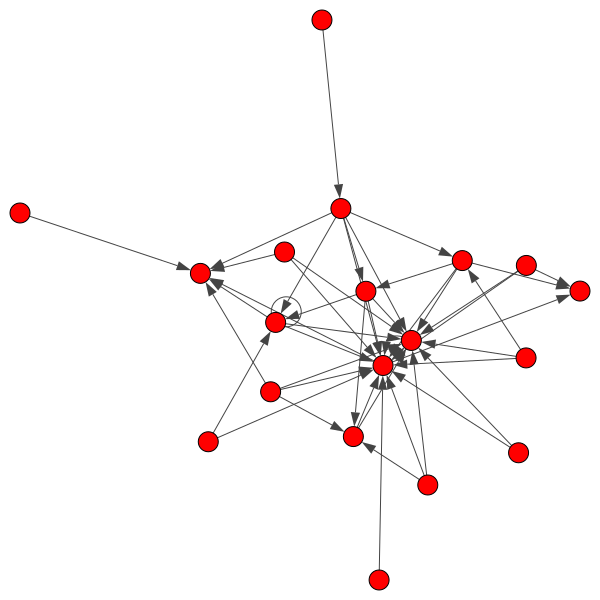

In [16]:
ig.plot(g)

In [17]:
len(g.vs.indices)

19

In [18]:
#g.vs.indices
com_0['node_start'].value_counts()

Switzerland    6
Isle of Man    4
Mauritius      4
Hungary        4
Belize         4
Sweden         3
Portugal       3
Poland         3
Finland        3
Bahamas        3
Qatar          2
Ukraine        2
Lithuania      2
Albania        1
Guinea         1
Niue           1
Haiti          1
Name: node_start, dtype: int64

In [19]:
uni =com_0['node_start'].unique()

In [20]:
len(uni)

17

In [21]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7f7f444b5220>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7f444b5220>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7f444b5220>, 2, {'name': 'Nevada'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7f444b5220>, 3, {'name': 'Niue'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7f444b5220>, 4, {'name': 'Wyoming'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7f444b5220>, 5, {'name': 'Belize'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7f444b5220>, 6, {'name': 'Mauritius'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7f444b5220>, 7, {'name': 'Finland'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7f444b5220>, 8, {'name': 'Guinea'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7f444b5220>, 9, {'name': 'Switzerland'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7f444b5220>, 10, {'name': 'Haiti'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7f444b5220>, 11, {'name': 'Hungary'}),
 igraph.Vertex(<igraph.Graph

In [22]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'In_Degree':g.strength(mode='in',weights='weight')})

In [23]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [24]:
temp_df.head()

,Node_indice,Nodes,In_Degree
1,1,Bahamas,7298.0
3,3,Niue,5620.0
2,2,Nevada,910.0
4,4,Wyoming,34.0
13,13,Isle of Man,28.0


In [25]:
temp_df.tail()

,Node_indice,Nodes,In_Degree
11,11,Hungary,0.0
10,10,Haiti,0.0
8,8,Guinea,0.0
7,7,Finland,0.0
18,18,Sweden,0.0


In [26]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()
#print the list to check it
order_of_del

['Bahamas',
 'Niue',
 'Nevada',
 'Wyoming',
 'Isle of Man',
 'Mauritius',
 'Belize',
 'Ukraine',
 'Switzerland',
 'Qatar',
 'Portugal',
 'Poland',
 'Lithuania',
 'Albania',
 'Hungary',
 'Haiti',
 'Guinea',
 'Finland',
 'Sweden']

In [27]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    pr = []
    auth = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #try pagerank 
        page = g.pagerank(directed=True, weights='weight')
        page = sum(page)/max(len(page),1)
        pr.append(page)
        #authority score normalised by default
        kleinberg = g.authority_score(weights='weight')
        kleinberg = sum(kleinberg)/max(len(kleinberg),1)
        auth.append(kleinberg)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
    return(df)

In [28]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
0,1,0.01,Bahamas,2.444444,552.0,-0.160801,327.444444,0.092593,0.055556,0.059784,1.551020
1,2,0.01,Niue,1.823529,24.0,0.025208,22.941176,0.065744,0.058824,0.063481,1.694444
2,3,0.02,Nevada,1.312500,14.0,-0.013387,3.875000,0.054688,0.062500,0.093873,1.653846
3,4,0.02,Wyoming,1.133333,14.0,0.033150,3.866667,0.053333,0.066667,0.099878,1.619048
4,5,0.03,Isle of Man,0.928571,14.0,-0.218218,2.142857,0.040816,0.071429,0.124292,1.600000


In [29]:
df_type2_weighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,avg_PageRank,avg_Authority,average_path_len
14,15,0.08,Hungary,0.0,0.0,NaN,0.0,0.0,0.250000,1.0,NaN
15,16,0.08,Haiti,0.0,0.0,NaN,0.0,0.0,0.333333,1.0,NaN
16,17,0.09,Guinea,0.0,0.0,NaN,0.0,0.0,0.500000,1.0,NaN
17,18,0.09,Finland,0.0,0.0,NaN,0.0,0.0,1.000000,1.0,NaN
18,19,0.10,Sweden,0.0,NaN,NaN,0.0,NaN,0.000000,0.0,NaN


### Weighted

#### Weighted has to set y-limit because of huge range

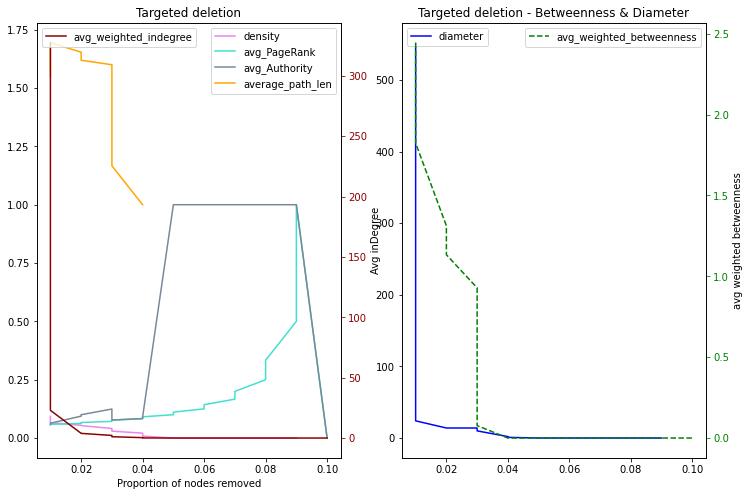

In [30]:
  #Same but weighted
    #Don't share y axis for type2
fig, ax = plt.subplots(1,2,figsize=(12,8),sharey=False)

#Targeted attack LHS Graphs

    
ax[0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
#remove assortativity degree, replace with pagerank
ax[0].plot('prop_removed','avg_PageRank',data=df_type2_weighted,ls='-',color='turquoise')
# add in Authority
ax[0].plot('prop_removed','avg_Authority',data=df_type2_weighted,ls='-',color='lightslategray')
ax[0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Targeted deletion')

ax2_2 = ax[0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1].legend(loc='upper left')
    
    
ax_bet_tar = ax[1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()

### Set up Function for other community

In [31]:
## try for 1st community: 1
com_1 = community_edgelist_dfs[1]



## Attack nodes

In [32]:
#Function to run everything 
#n will be community number just so the plot looks nice
def run_all(comm,n):
    #Plot graph 
    g1 = ig.Graph.TupleList(comm.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})
    ig.plot(g1)
    #g.vs.indices
    viz1=comm['node_start'].value_counts()
    #print('Viz1:',viz1)
    uni =comm['node_start'].unique()
    ##try sort by indegree 
    temp_df = pd.DataFrame({'Node_indice':g1.vs.indices,
                         'Nodes':g1.vs['name'],
                         'In_Degree':g1.strength(mode='in',weights='weight')})
    #sort by largest degree 
    temp_df = temp_df.sort_values(by='In_Degree',ascending=False)
    viz2 = temp_df
    #print('----------------------')
    #print('Viz2:',viz2)
    #extract out by Node
    order_of_del = temp_df['Nodes'].tolist()
    
    
    ##don't bother with unweighted so will just attempt with weighted
    #Weighted on diameter
    def weighted_Type2_targeted_del(G):
        g = G.copy()
    
        num_node_removed = []
        prop_removed=[]
        node_removed = []
        dia = []
        assort_deg = []
        degree = []
        density = []
        apl = []
        bet = []
        pr = []
        auth = []
        for i in range(len(g.vs)):
            g.delete_vertices(order_of_del[i])
            #print(order_of_del[i])
            diameter = g.diameter(directed=True, weights='weight')
            dia.append(diameter)
        
            asdeg = g.assortativity_degree()
            assort_deg.append(asdeg)
        
            dense = g.density(loops=True)
            density.append(dense)
        
            between = g.betweenness(directed=True, weights='weight')
            between = sum(between)/max(len(between),1)
            bet.append(between)
            
            #try pagerank 
            page = g.pagerank(directed=True, weights='weight')
            page = sum(page)/max(len(page),1)
            pr.append(page)
            #authority score normalised by default
            kleinberg = g.authority_score(weights='weight')
            kleinberg = sum(kleinberg)/max(len(kleinberg),1)
            auth.append(kleinberg)
            
            
            #use strength
            deg = g.strength(mode='in',weights='weight')
            deg = sum(deg)/max(len(deg),1)
            degree.append(deg)
        
            avgpl = g.average_path_length()
            apl.append(avgpl)
        
            num_node_removed.append(i+1)
            prop = round((i+1)/len(order_of_del),2)
            prop_removed.append(prop)
            node_removed.append(order_of_del[i])


        df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
        return(df)
    
    
    
    
    #re-use func from above
    df_type2_weighted = weighted_Type2_targeted_del(g1)
    viz3 = df_type2_weighted.head(15)
    #print(viz3)
    
    #Same but weighted
    #Don't share y axis for type2
    fig, ax = plt.subplots(1,2,figsize=(12,8),sharey=False)

   #Targeted attack LHS Graphs

    
    ax[0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
    #remove assortativity degree, replace with pagerank
    ax[0].plot('prop_removed','avg_PageRank',data=df_type2_weighted,ls='-',color='turquoise')
    # add in Authority
    ax[0].plot('prop_removed','avg_Authority',data=df_type2_weighted,ls='-',color='lightslategray')
    ax[0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
    ax[0].legend(loc='upper right')
    ax[0].set_xlabel('Proportion of nodes removed')
    ax[0].set_title('Targeted deletion - Nodes Community {}'.format(n))

    ax2_2 = ax[0].twinx()
    ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
    ax2_2.set_ylabel('Avg inDegree')
    ax2_2.legend(loc='upper left')
    ax2_2.tick_params('y',colors='darkred')


    #Targeted attack RHS Graphs - Betweenness & Diameter 

    ax[1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
    ax[1].set_title('Targeted deletion - Betweenness & Diameter')
    ax[1].legend(loc='upper left')
    
    
    ax_bet_tar = ax[1].twinx()
    ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
    ax_bet_tar.tick_params('y',colors='green')
    ax_bet_tar.set_ylabel('avg weighted betweenness')
    ax_bet_tar.legend(loc='upper right')
    plt.show()
    
    return viz1,viz2,viz3

## Attack edges

In [33]:
#Function to run everything 
#n will be community number just so the plot looks nice
def run_all_edges(comm,n):
    #Plot graph 
    g1 = ig.Graph.TupleList(comm.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})
    ig.plot(g1)
    #g.vs.indices
    viz1=comm['node_start'].value_counts()
    #print('Viz1:',viz1)
    uni =comm['node_start'].unique()
    #because the g.es only shows the edge ID, we need to get the vertex source and target
    ##sv = source vertex 
    ##st = source target 
    sv = []
    st = []
    for edge in g1.es:
        source_vertex_id = edge.source
        target_vertex_id = edge.target
        source_vertex = g1.vs[source_vertex_id]
        sv.append(source_vertex)
        target_vertex = g1.vs[target_vertex_id]
        st.append(target_vertex)

        
    ##get name of source vertices. sv and st each is an igraph object so need to slice them to get the names

    sv_name = []
    for i in range(len(sv)):
        name = sv[i]['name']
        sv_name.append(name)
    
    st_name = []
    for i in range(len(st)):
        target_name = st[i]['name']
        st_name.append(target_name)
    


    ## new df with edges
    edge_df = pd.DataFrame({'Edge_indice':g1.es.indices,
                         'Edges_weight':g1.es['weight'],
                         'Vertex_source':sv_name,
                         'Vertex_target':st_name})
   ##sort by descending weight
    edge_df = edge_df.sort_values(by='Edges_weight',ascending=False)
    viz2 = edge_df
    #print('----------------------')
    #print('Viz2:',viz2)
    #extract out by edge ID 
    edge_deletelist = edge_df['Edge_indice'].tolist()
    
    
    ##don't bother with unweighted so will just attempt with weighted
    #Weighted on diameter
    def Edges_weighted_Type2_targeted_del(G):
        g = G.copy()
    
        num_node_removed = []
        prop_removed=[]
        node_removed = []
        dia = []
        assort_deg = []
        degree = []
        density = []
        apl = []
        bet = []
        pr = []
        auth = []
        for i in range(len(g.es)):
            try:
                g.delete_edges(edge_deletelist[i])
            except:
                continue
            #print(order_of_del[i])
            diameter = g.diameter(directed=True, weights='weight')
            dia.append(diameter)
        
            asdeg = g.assortativity_degree()
            assort_deg.append(asdeg)
        
            dense = g.density(loops=True)
            density.append(dense)
        
            between = g.betweenness(directed=True, weights='weight')
            between = sum(between)/max(len(between),1)
            bet.append(between)
        
            #try pagerank 
            page = g.pagerank(directed=True, weights='weight')
            page = sum(page)/max(len(page),1)
            pr.append(page)
            #authority score normalised by default
            kleinberg = g.authority_score(weights='weight')
            kleinberg = sum(kleinberg)/max(len(kleinberg),1)
            auth.append(kleinberg)
        
            #use strength
            deg = g.strength(mode='in',weights='weight')
            deg = sum(deg)/max(len(deg),1)
            degree.append(deg)
        
            avgpl = g.average_path_length()
            apl.append(avgpl)
        
            num_node_removed.append(i+1)
            prop = round((i+1)/len(edge_deletelist),2) 
            prop_removed.append(prop)
            node_removed.append(edge_deletelist[i])


        df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'avg_PageRank':pr,
                       'avg_Authority':auth,
                       'average_path_len':apl})
    
        return(df)
    
    
    
    
    #re-use func from above
    edgedf_type2_weighted = Edges_weighted_Type2_targeted_del(g1)
    viz3 = edgedf_type2_weighted.head(15)
    #print(viz3)
    
    #Same but weighted
    #Don't share y axis for type2
    fig, ax = plt.subplots(1,2,figsize=(12,8),sharey=False)

   #Targeted attack LHS Graphs

    
    ax[0].plot('prop_removed','density',data=edgedf_type2_weighted,ls='-',color='violet')
    #remove assortativity degree, replace with pagerank
    ax[0].plot('prop_removed','avg_PageRank',data=edgedf_type2_weighted,ls='-',color='turquoise')
    # add in Authority
    ax[0].plot('prop_removed','avg_Authority',data=edgedf_type2_weighted,ls='-',color='lightslategray')
    ax[0].plot('prop_removed','average_path_len',data=edgedf_type2_weighted,ls='-',color='orange')
    ax[0].legend(loc='upper right')
    ax[0].set_xlabel('Proportion of edges removed')
    ax[0].set_title('Targeted deletion - Edges Community {}'.format(n))

    ax2_2 = ax[0].twinx()
    ax2_2.plot('prop_removed','avg_weighted_indegree',data=edgedf_type2_weighted,ls='-',color='darkred')
    ax2_2.set_ylabel('Avg inDegree')
    ax2_2.legend(loc='upper left')
    ax2_2.tick_params('y',colors='darkred')


    #Targeted attack RHS Graphs - Betweenness & Diameter 

    ax[1].plot('prop_removed','diameter',data=edgedf_type2_weighted,ls='-',color='blue')
    ax[1].set_title('Targeted deletion - Betweenness & Diameter')
    ax[1].legend(loc='upper left')
    
    
    ax_bet_tar = ax[1].twinx()
    ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=edgedf_type2_weighted,ls='--',color='green')
    ax_bet_tar.tick_params('y',colors='green')
    ax_bet_tar.set_ylabel('avg weighted betweenness')
    ax_bet_tar.legend(loc='upper right')
    plt.show()
    
    return viz1,viz2,viz3

#### Community 0 (attack edges) ; earlier graph above function was on attack nodes

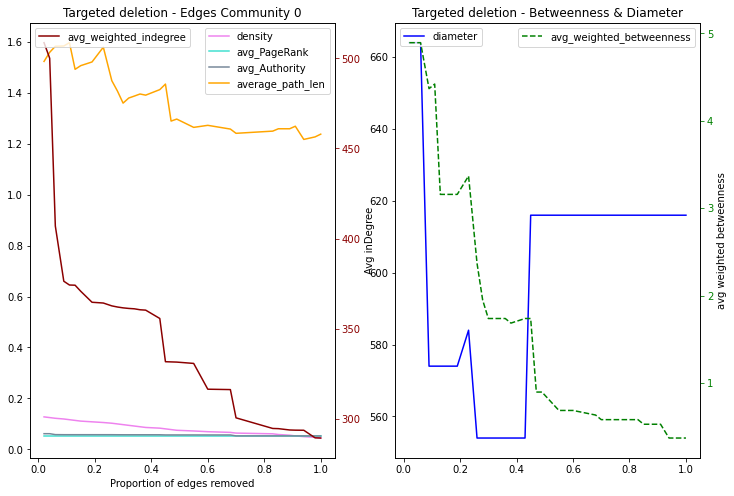

In [34]:
com0edge,com0edge2,com0edge3 = run_all_edges(com_0,0)

### Community 1, 2, 3, 4, 5

In [35]:
##Comm3
com_1 = community_edgelist_dfs[1]
com_2 = community_edgelist_dfs[2]
com_3 = community_edgelist_dfs[3]
com_4 = community_edgelist_dfs[4]
com_5 = community_edgelist_dfs[5]




#### Community 1

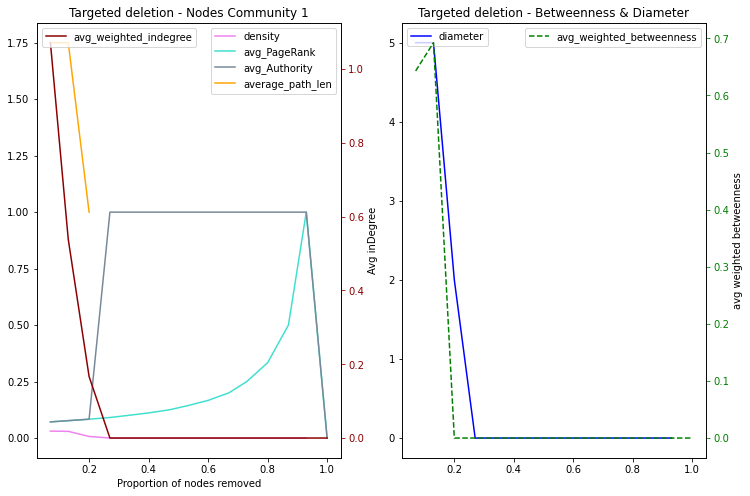

In [36]:
#Attack nodes
com1_value_count, com1_sortbydeg, com1_dfplot = run_all(com_1,1)

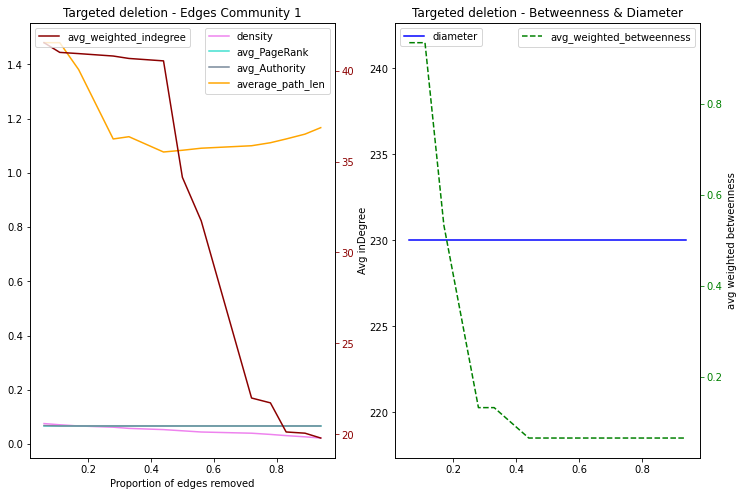

In [37]:
#Attack edges
com1_value_countedge, com1_sortbydegedge, com1_dfplotedge = run_all_edges(com_1,1)

#### Community 2

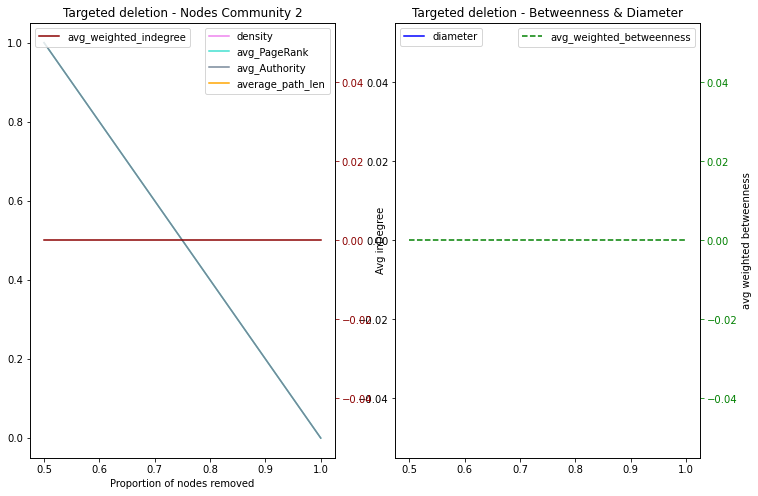

In [38]:
#Nodes
com2_value_count, com2_sortbydeg, com2_dfplot = run_all(com_2,2)

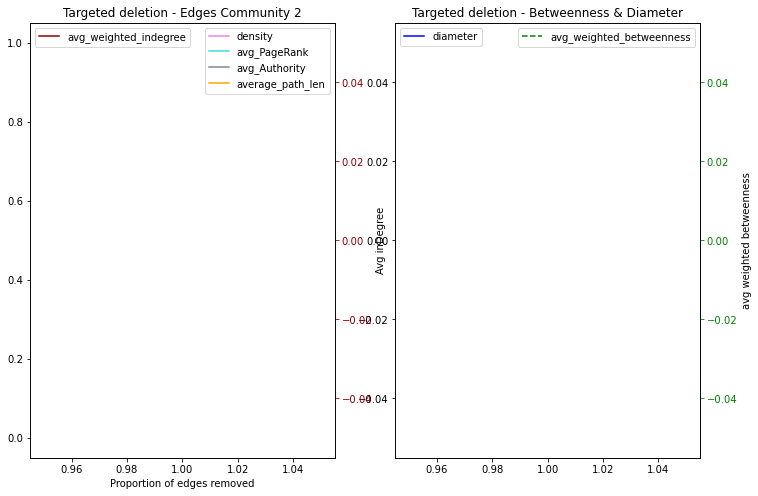

In [39]:
#Edges
com2_value_countedge, com2_sortbydegedge, com2_dfplotedge = run_all_edges(com_2,2)

#### Community 3

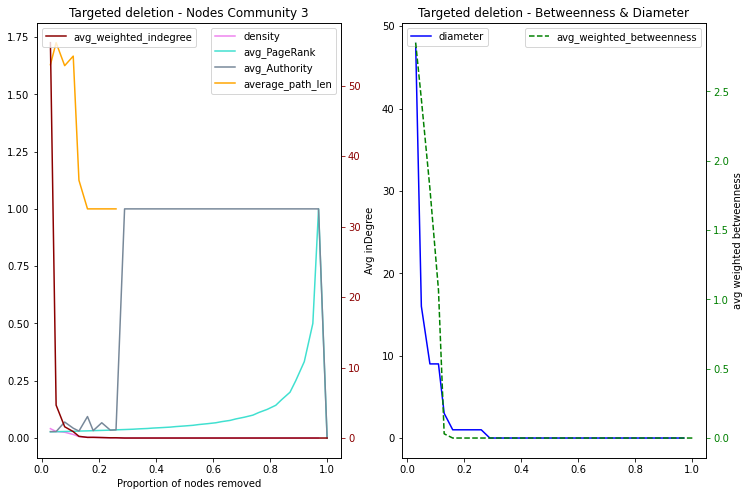

In [40]:
#Nodes
com3_value_count, com3_sortbydeg, com3_dfplot = run_all(com_3,3)

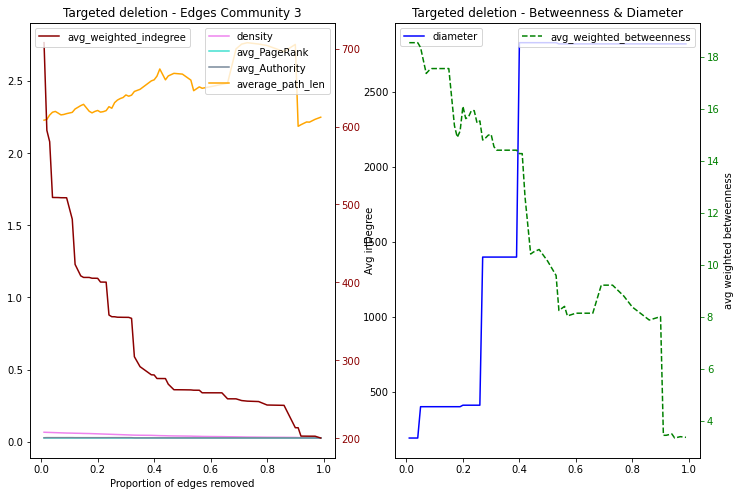

In [41]:
#Edges
com3_value_countedge, com3_sortbydegedge, com3_dfplotedge = run_all_edges(com_3,3)

#### Community 4

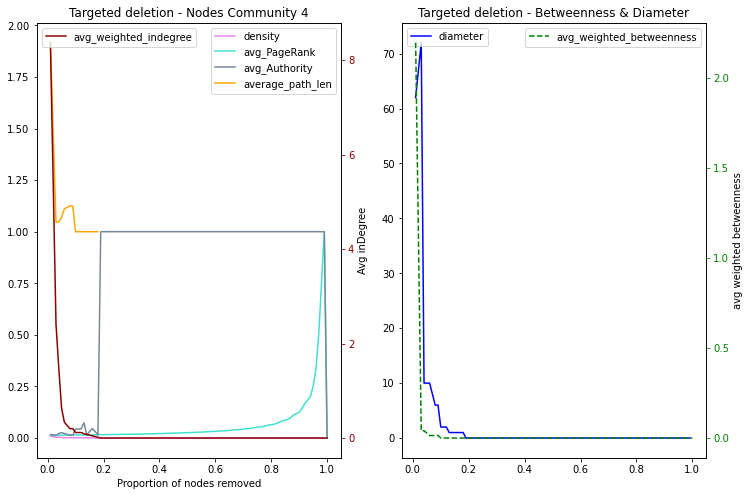

In [42]:
#Nodes
com4_value_count, com4_sortbydeg, com4_dfplot = run_all(com_4,4)

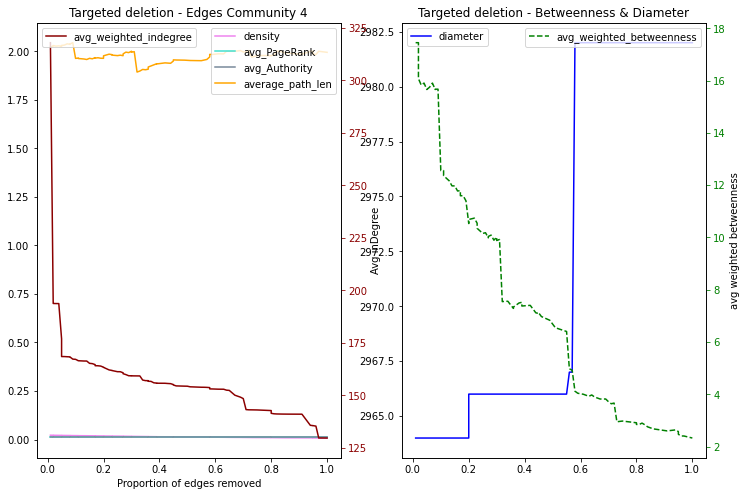

In [43]:
#Edges
com4_value_countedge, com4_sortbydegedge, com4_dfplotedge = run_all_edges(com_4,4)

In [44]:
com4_value_count

Taiwan                    10
British Virgin Islands     4
Bermuda                    4
Liberia                    3
Kazakhstan                 3
                          ..
Oman                       1
Libya                      1
Bhutan                     1
Kenya                      1
Bosnia and Herzegovina     1
Name: node_start, Length: 77, dtype: int64

In [45]:
com4_sortbydeg

,Node_indice,Nodes,In_Degree
2,2,British Virgin Islands,39546.0
1,1,Bermuda,462.0
15,15,Liechtenstein,82.0
3,3,Antigua and Barbuda,70.0
7,7,Austria,25.0
...,...,...,...
39,39,Lebanon,0.0
40,40,Libya,0.0
41,41,Macedonia,0.0
42,42,Malawi,0.0


#### Community 5

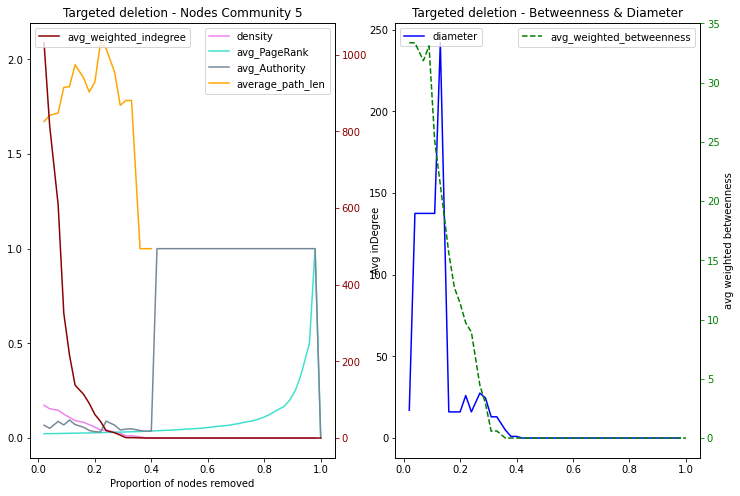

In [46]:
#Nodes
com5_value_count, com5_sortbydeg, com5_dfplot = run_all(com_5,5)

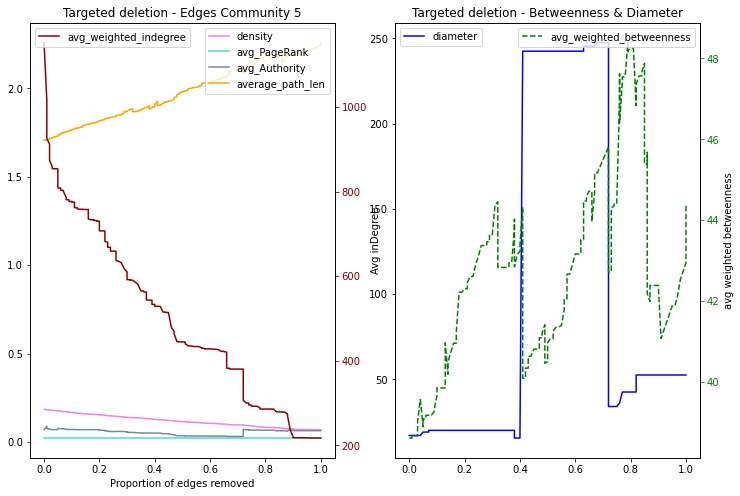

In [47]:
#Edges
com5_value_countedge, com5_sortbydegedge, com5_dfplotedge = run_all_edges(com_5,5)

In [48]:
com5_value_count

Hong Kong                21
Singapore                20
United States            20
China                    19
United Kingdom           18
Cyprus                   17
Cayman Islands           16
Malaysia                 16
Indonesia                16
Samoa                    15
Thailand                 15
Russia                   15
India                    14
Cook Islands             13
Seychelles               13
Saint Kitts and Nevis    12
Latvia                   10
Ireland                   9
Czech Republic            9
Fiji                      8
Brunei                    8
Bulgaria                  7
French Polynesia          5
Marshall Islands          5
Tonga                     5
Nepal                     5
Cambodia                  5
Georgia                   5
Croatia                   4
Kyrgyzstan                4
Nauru                     3
Tajikistan                3
Namibia                   3
Madagascar                3
Lesotho                   2
Algeria             

In [49]:
com5_sortbydeg

,Node_indice,Nodes,In_Degree
4,4,Seychelles,14002.0
1,1,United Kingdom,9556.0
20,20,Samoa,9167.0
8,8,Hong Kong,6918.5
9,9,Russia,6389.0
2,2,United States,2444.0
15,15,Cayman Islands,2088.0
12,12,Ireland,2005.0
7,7,Cyprus,1904.0
6,6,China,1424.0


### Spinglass Only Jurisdiction

In [50]:
spinglass_only_jur_df = pd.read_csv('../directed_community_csv/df_spinglass_only_juris.csv').drop('Unnamed: 0', axis = 1)
spinglass_only_jur_df

,name,community
0,Albania,2
1,Bahamas,2
2,Andorra,5
3,British Virgin Islands,1
4,Cayman Islands,4
...,...,...
169,Venezuela,5
170,Vietnam,4
171,Yemen,5
172,Zambia,1


In [51]:
#make a list of communities to run next function

spinglass_only_jur_comms = sorted(spinglass_only_jur_df['community'].unique().tolist())
spinglass_only_jur_comms

[0, 1, 2, 3, 4, 5]

In [52]:
# get edge list for all communities

oj_community_edgelist_dfs = []

for i in range(len(spinglass_only_jur_comms)):
    oj_community_edgelist_dfs.append(get_edge_list(comm = i, comm_node_df = spinglass_only_jur_df, edges_df =  df_only_jur_grouped))
    



In [53]:
##Community only jurisdiction
oj_com_0 = oj_community_edgelist_dfs[0]
oj_com_1 = oj_community_edgelist_dfs[1]
oj_com_2 = oj_community_edgelist_dfs[2]
oj_com_3 = oj_community_edgelist_dfs[3]
oj_com_4 = oj_community_edgelist_dfs[4]
oj_com_5 = oj_community_edgelist_dfs[5]

#### Community 0

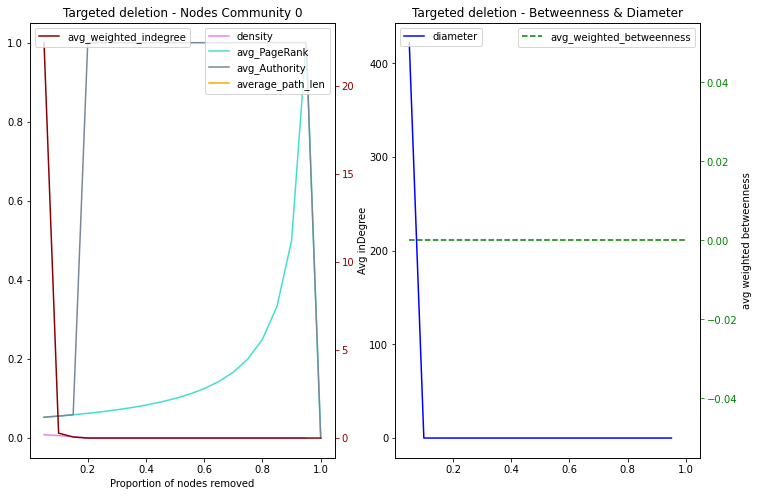

In [54]:
#Nodes
oj_com0_value_count, oj_com0_sortbydeg, oj_com0_dfplot = run_all(oj_com_0,0)

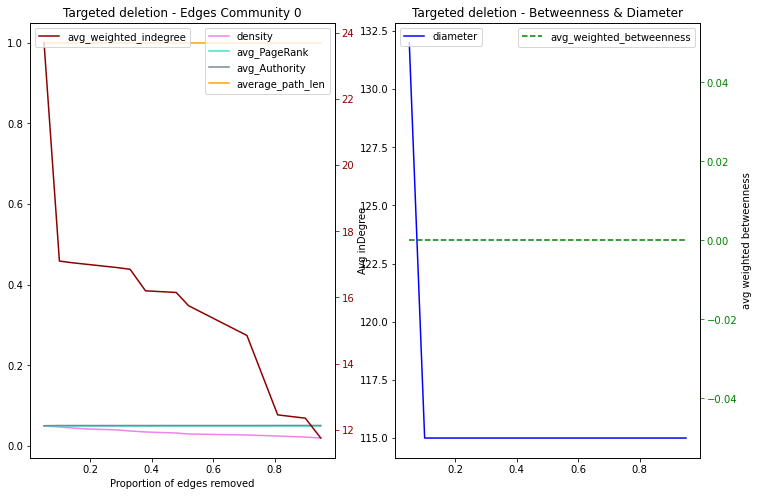

In [55]:
#edge
oj_com0_value_countedge, oj_com0_sortbydegedge, oj_com0_dfplotedge = run_all_edges(oj_com_0,0)

#### Community 1

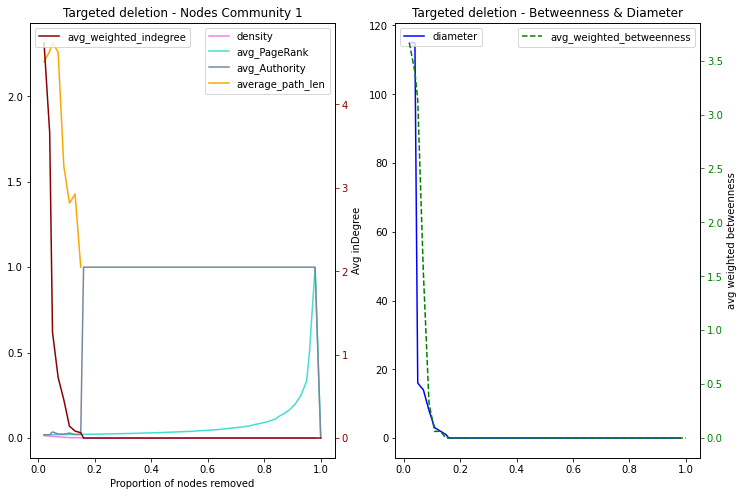

In [56]:
#Nodes
oj_com1_value_count, oj_com1_sortbydeg, oj_com1_dfplot = run_all(oj_com_1,1)

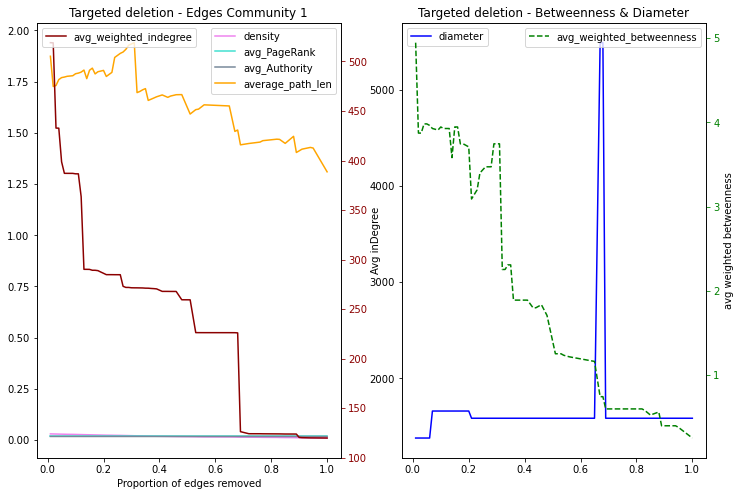

In [57]:
#Edge
oj_com1_value_countedge, oj_com1_sortbydegedge, oj_com1_dfplotedge = run_all_edges(oj_com_1,1)

#### Community 2

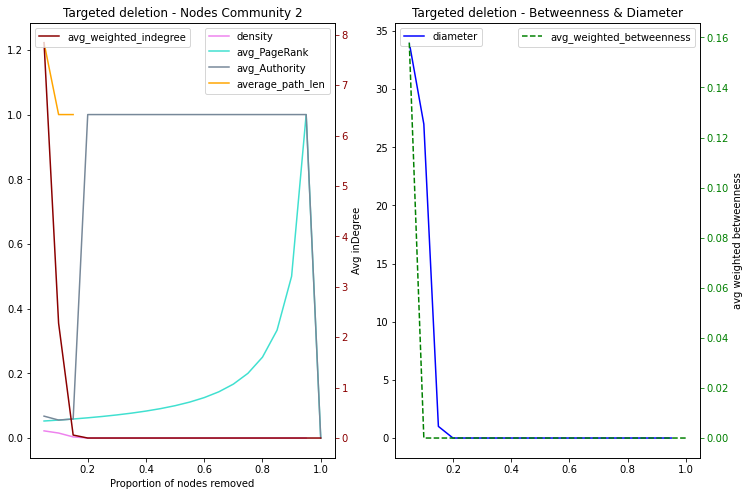

In [58]:
#Nodes
oj_com2_value_count, oj_com2_sortbydeg, oj_com2_dfplot = run_all(oj_com_2,2)

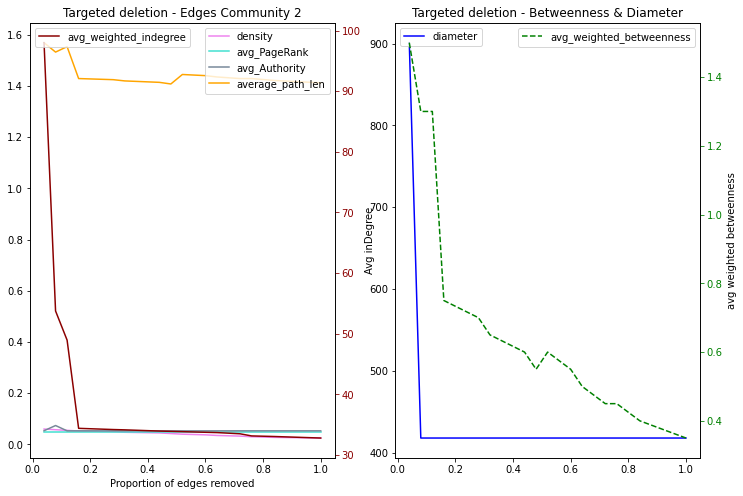

In [59]:
#edges
oj_com2_value_countedge, oj_com2_sortbydegedge, oj_com2_dfplotedge = run_all_edges(oj_com_2,2)

In [60]:
oj_com2_sortbydegedge

,Edge_indice,Edges_weight,Vertex_source,Vertex_target
18,18,1335,Russia,Bahamas
8,8,885,Isle of Man,Bahamas
22,22,403,United States,Bahamas
2,2,291,Bahamas,Nevada
24,24,96,United States,Nevada
21,21,82,Ukraine,Bahamas
14,14,58,Poland,Bahamas
5,5,32,Finland,Bahamas
23,23,27,United States,Isle of Man
19,19,22,Sweden,Bahamas


#### Community 3

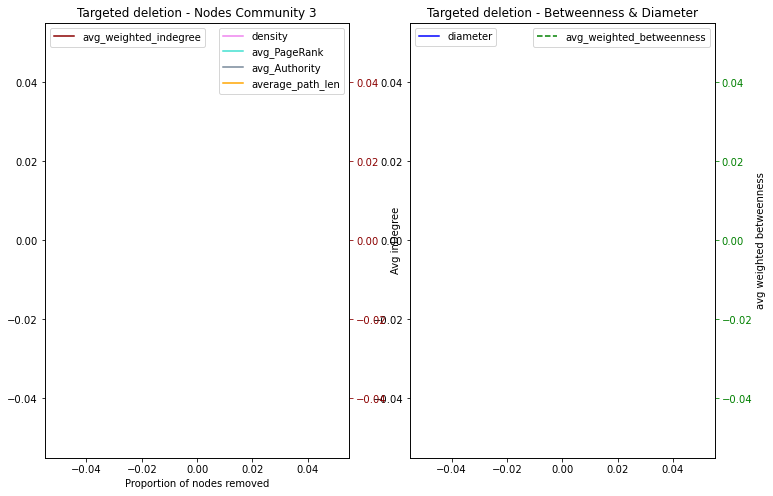

In [61]:
#Nodes
oj_com3_value_count, oj_com3_sortbydeg, oj_com3_dfplot = run_all(oj_com_3,3)

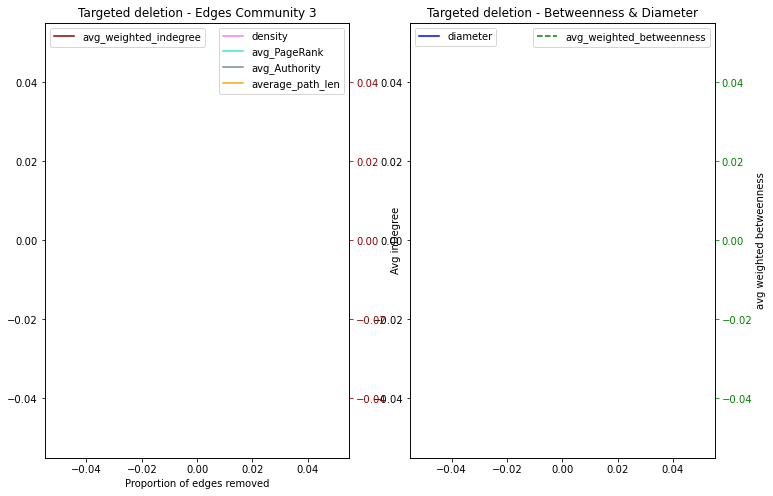

In [62]:
#edges
oj_com3_value_countedge, oj_com3_sortbydegedge, oj_com3_dfplotedge = run_all_edges(oj_com_3,3)

#### Community 4

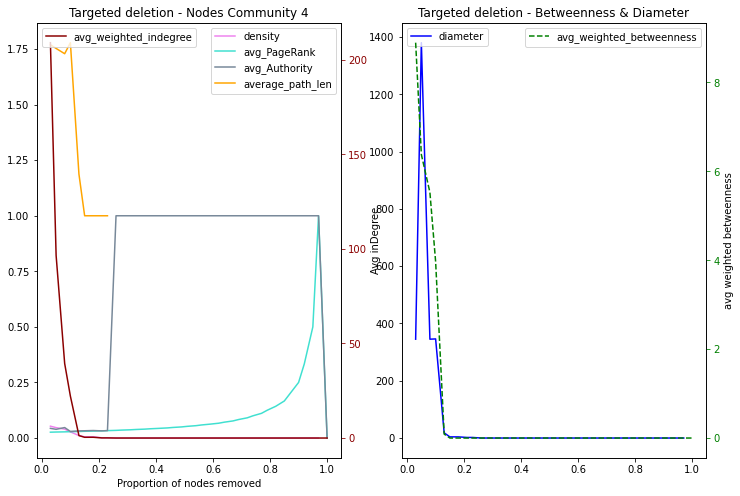

In [63]:
#Nodes
oj_com4_value_count, oj_com4_sortbydeg, oj_com4_dfplot = run_all(oj_com_4,4)

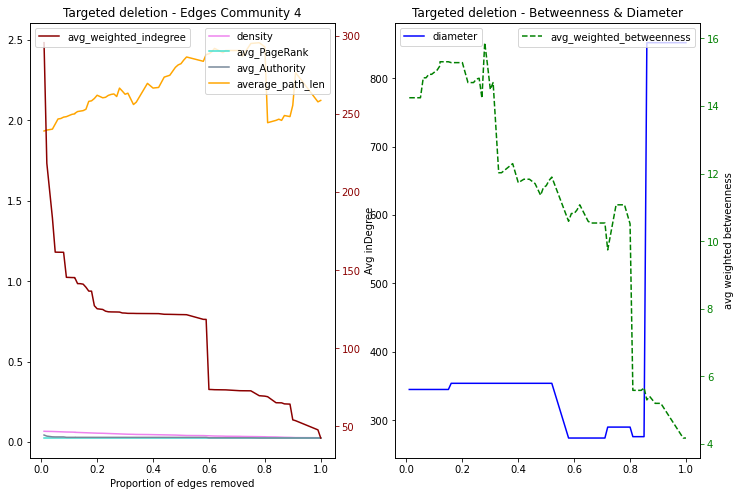

In [64]:
#Edges
oj_com4_value_countedge, oj_com4_sortbydegedge, oj_com4_dfplotedge = run_all_edges(oj_com_4,4)

#### Community 5

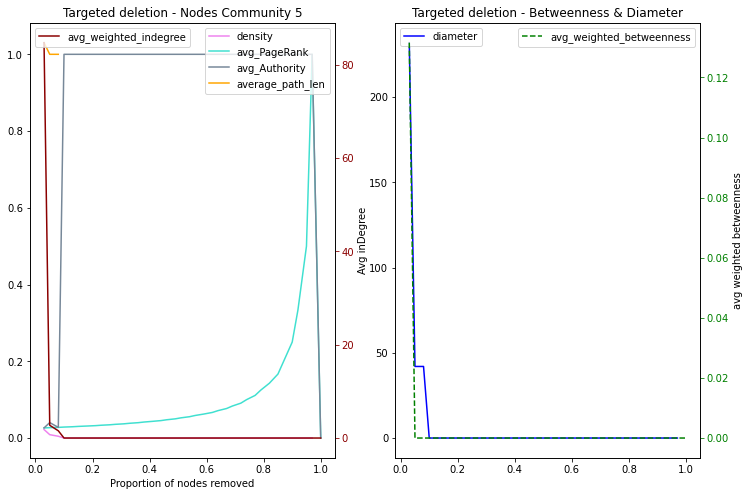

In [65]:
#Nodes
oj_com5_value_count, oj_com5_sortbydeg, oj_com5_dfplot = run_all(oj_com_5,5)

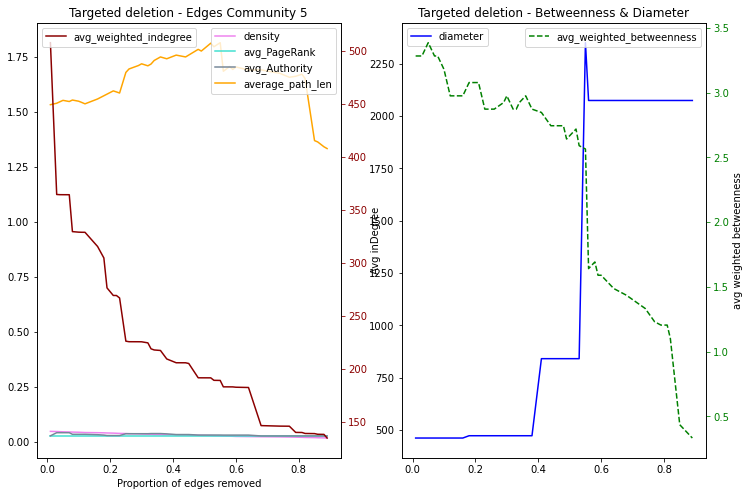

In [66]:
#Edges
oj_com5_value_countedge, oj_com5_sortbydegedge, oj_com5_dfplotedge = run_all_edges(oj_com_5,5)

### Spinglass All Jurisdiction

In [67]:
spinglass_all_jur_df = pd.read_csv('../directed_community_csv/df_spinglass_all_juris.csv').drop('Unnamed: 0', axis = 1)
spinglass_all_jur_df

,name,community
0,Albania,4
1,Bahamas,4
2,Andorra,2
3,British Virgin Islands,0
4,Cayman Islands,5
...,...,...
169,Venezuela,2
170,Vietnam,5
171,Yemen,2
172,Zambia,0


In [68]:
#make a list of communities to run next function

spinglass_all_jur_comms = sorted(spinglass_all_jur_df['community'].unique().tolist())
spinglass_all_jur_comms

[0, 1, 2, 3, 4, 5, 6]

In [69]:
# get edge list for all communities
##check range is correct df 
#Check comm_node_df and edges_df

all_community_edgelist_dfs = []

for i in range(len(spinglass_all_jur_comms)):
    all_community_edgelist_dfs.append(get_edge_list(comm = i, comm_node_df = spinglass_all_jur_df, edges_df =  df_all_jur_grouped))
    




In [70]:
##Community all jurisdiction
all_com_0 = all_community_edgelist_dfs[0]
all_com_1 = all_community_edgelist_dfs[1]
all_com_2 = all_community_edgelist_dfs[2]
all_com_3 = all_community_edgelist_dfs[3]
all_com_4 = all_community_edgelist_dfs[4]
all_com_5 = all_community_edgelist_dfs[5]
all_com_6 = all_community_edgelist_dfs[6]

#### Community 0

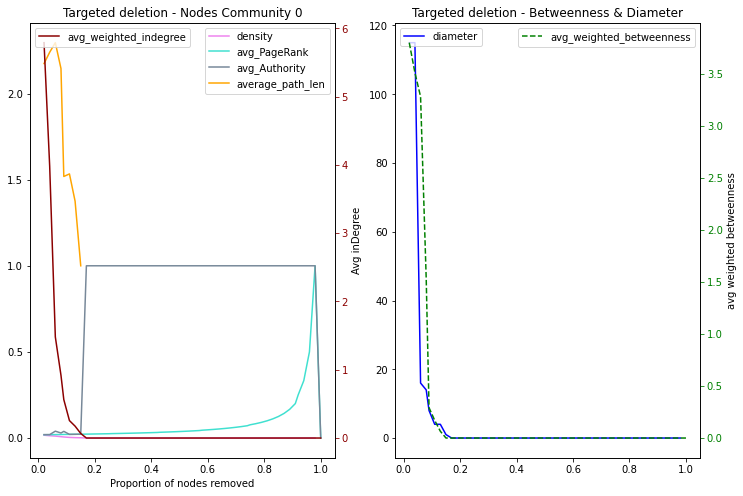

In [71]:
#Nodes
all_com0_value_count, all_com0_sortbydeg, all_com0_dfplot = run_all(all_com_0,0)

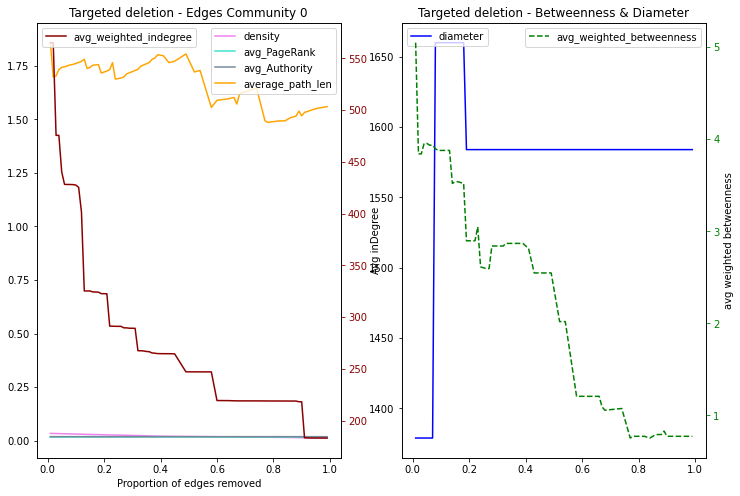

In [72]:
#Edges
all_com0_value_countedge, all_com0_sortbydegedge, all_com0_dfplotedge = run_all_edges(all_com_0,0)

#### Community 1

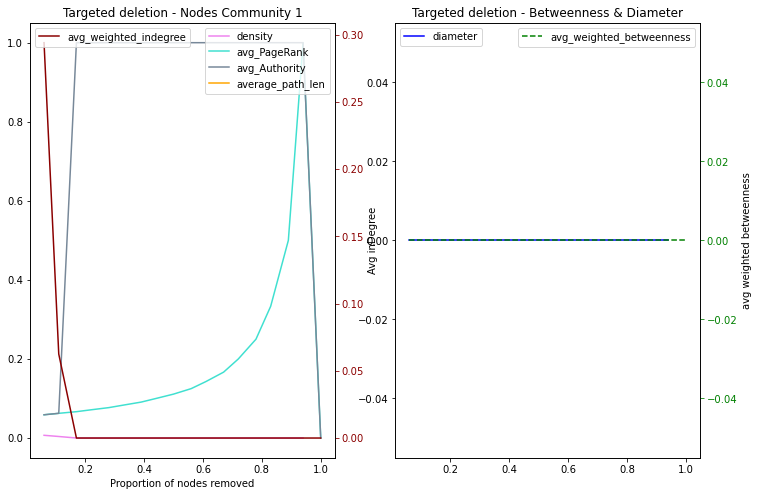

In [73]:
#Nodes
all_com1_value_count, all_com1_sortbydeg, all_com1_dfplot = run_all(all_com_1,1)

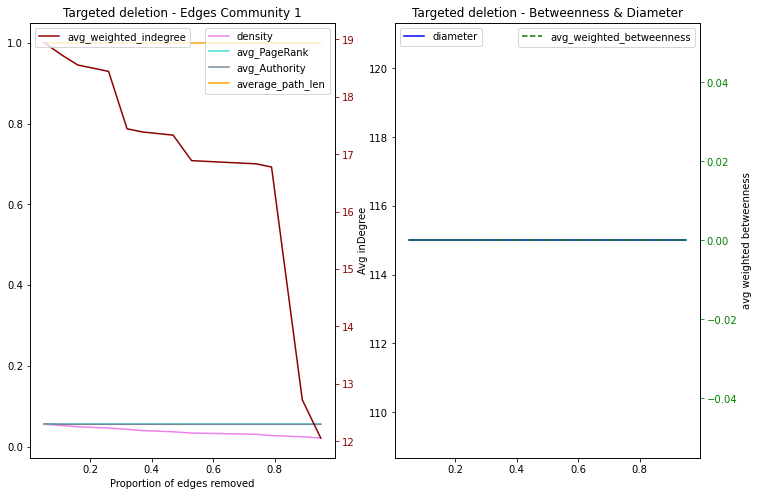

In [74]:
#Edges
all_com1_value_countedge, all_com1_sortbydegedge, all_com1_dfplotedge = run_all_edges(all_com_1,1)

#### Community 2

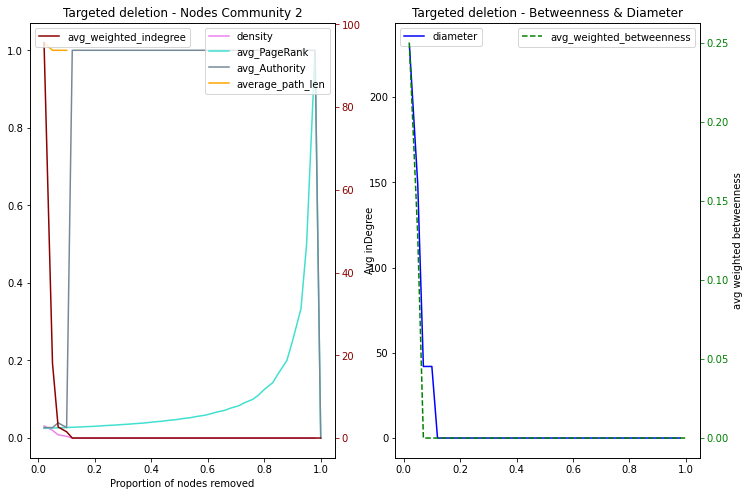

In [75]:
#Nodes
all_com2_value_count, all_com2_sortbydeg, all_com2_dfplot = run_all(all_com_2,2)

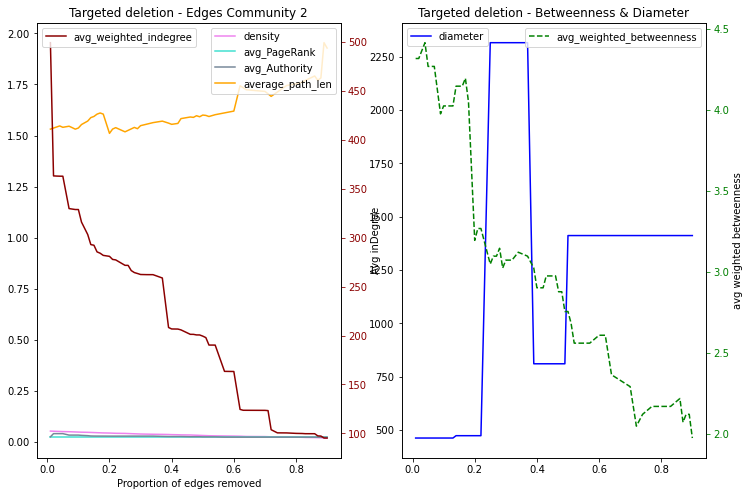

In [76]:
#edge
all_com2_value_countedge, all_com2_sortbydegedge, all_com2_dfplotedge = run_all_edges(all_com_2,2)

#### Community 3

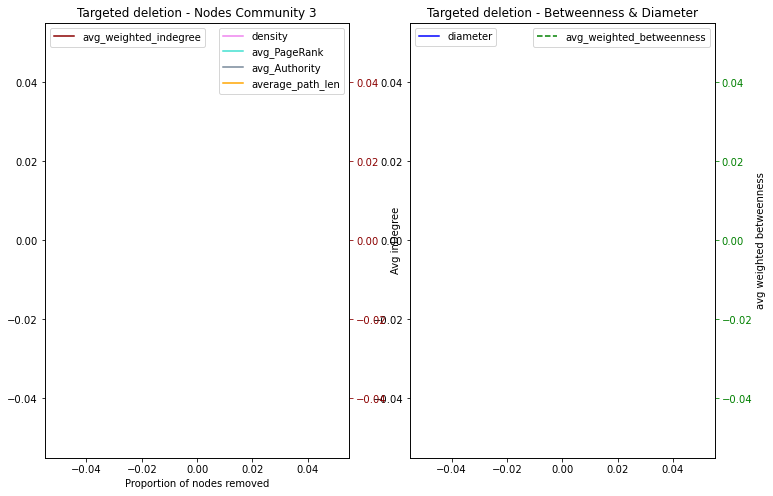

In [77]:
#Node
all_com3_value_count, all_com3_sortbydeg, all_com3_dfplot = run_all(all_com_3,3)

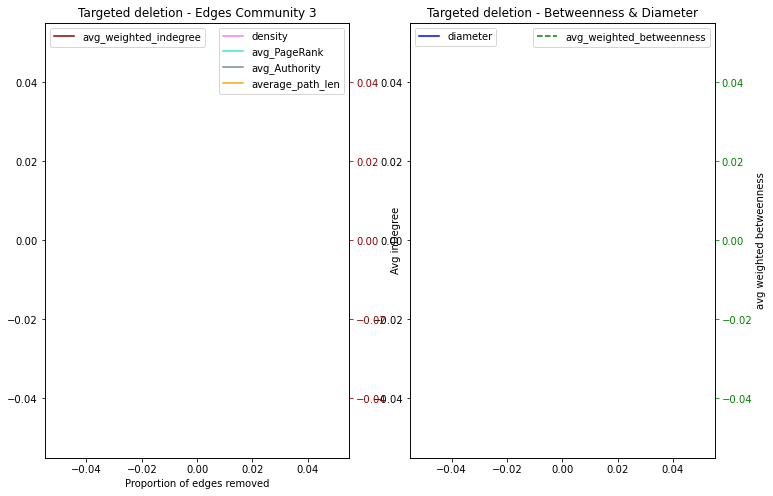

In [78]:
#edge
all_com3_value_countedge, all_com3_sortbydegedge, all_com3_dfplotedge = run_all_edges(all_com_3,3)

#### Community 4

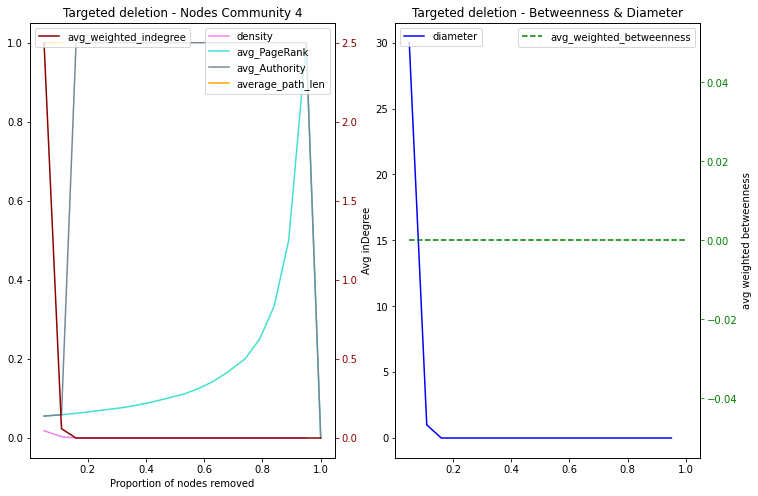

In [79]:
#nodes
all_com4_value_count, all_com4_sortbydeg, all_com4_dfplot = run_all(all_com_4,4)

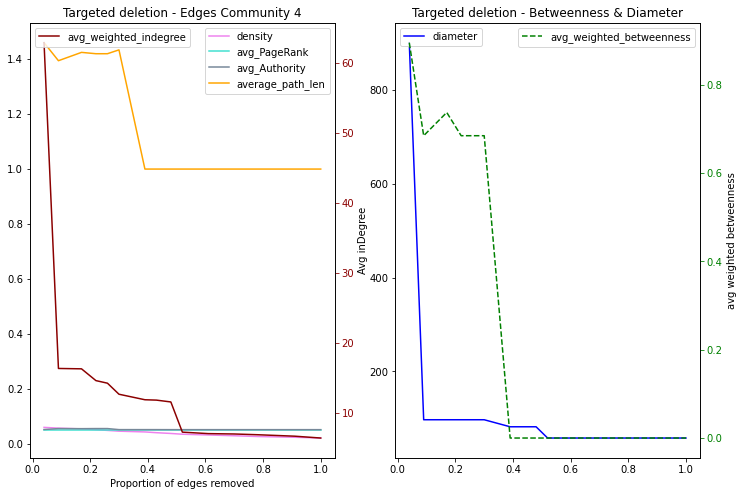

In [80]:
#edges
all_com4_value_countedge, all_com4_sortbydegedge, all_com4_dfplotedge = run_all_edges(all_com_4,4)

#### Community 5

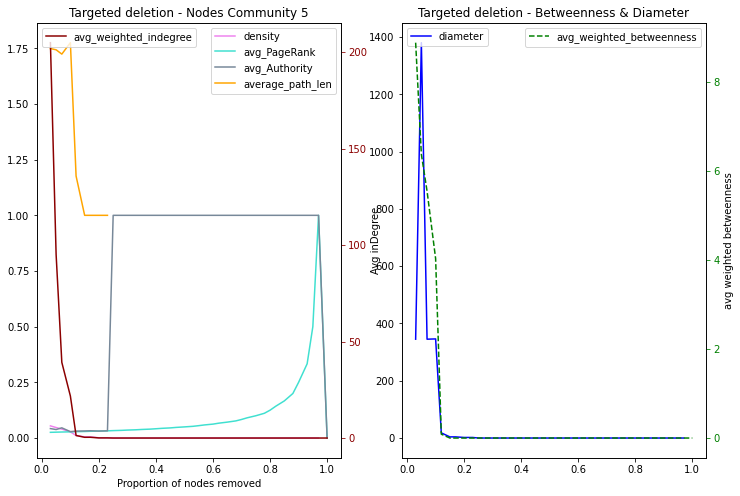

In [81]:
#Nodes
all_com5_value_count, all_com5_sortbydeg, all_com5_dfplot = run_all(all_com_5,5)

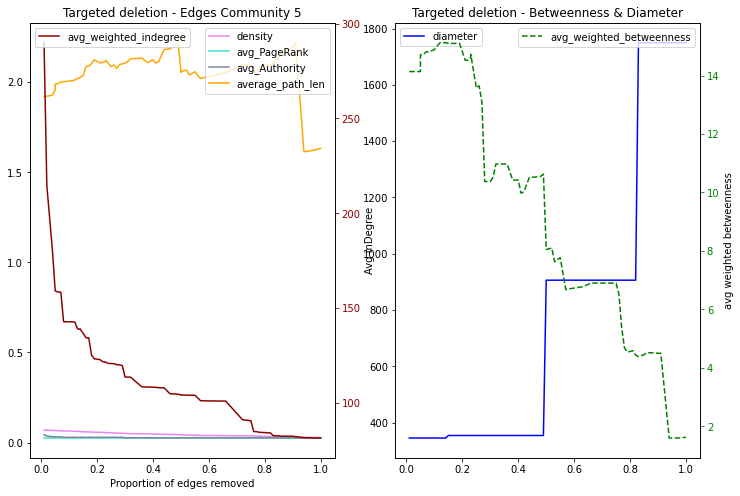

In [82]:
#edges
all_com5_value_countedge, all_com5_sortbydegedge, all_com5_dfplotedge = run_all_edges(all_com_5,5)

#### Community 6

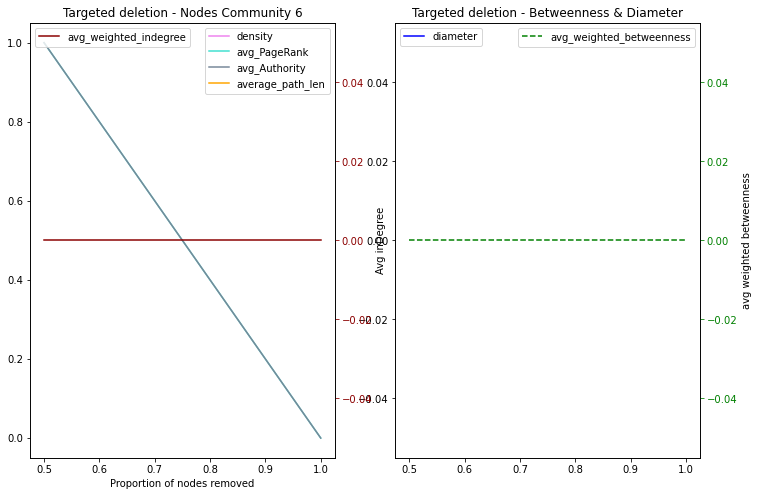

In [83]:
#Nodes
all_com6_value_count, all_com6_sortbydeg, all_com6_dfplot = run_all(all_com_6,6)

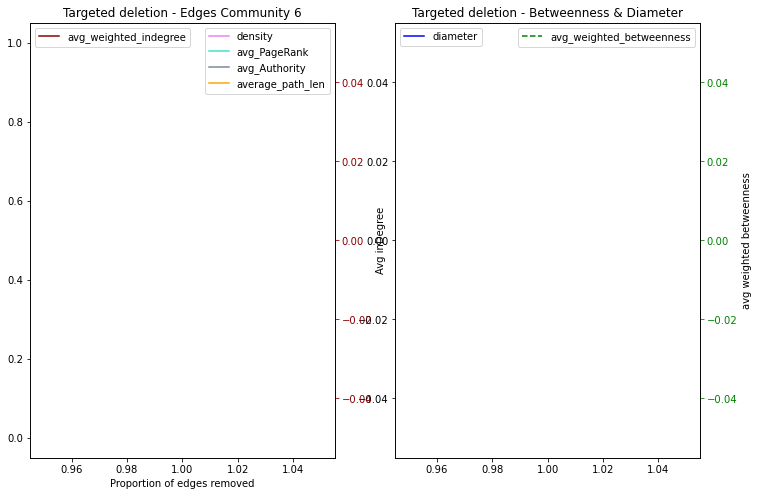

In [84]:
#edges
all_com6_value_countedge, all_com6_sortbydegedge, all_com6_dfplotedge = run_all_edges(all_com_6,6)

### Spinglass No Intermediaries

In [85]:
spinglass_no_int_df = pd.read_csv('../directed_community_csv/df_spinglass_no_inter.csv').drop('Unnamed: 0', axis = 1)
spinglass_no_int_df

,name,community
0,Albania,2
1,Bahamas,2
2,Algeria,4
3,British Virgin Islands,5
4,United Kingdom,4
...,...,...
190,Venezuela,1
191,Vietnam,5
192,Yemen,1
193,Zambia,5


In [86]:
#make a list of communities to run next function

spinglass_no_int_comms = sorted(spinglass_no_int_df['community'].unique().tolist())
spinglass_no_int_comms

[0, 1, 2, 3, 4, 5, 6]

In [87]:
# get edge list for all communities

no_int_community_edgelist_dfs = []

for i in range(len(spinglass_no_int_comms)):
    no_int_community_edgelist_dfs.append(get_edge_list(comm = i, comm_node_df = spinglass_no_int_df, edges_df =  df_no_int_grouped))
    




In [88]:
##Community No intermediaries
ni_com_0 = no_int_community_edgelist_dfs[0]
ni_com_1 = no_int_community_edgelist_dfs[1]
ni_com_2 = no_int_community_edgelist_dfs[2]
ni_com_3 = no_int_community_edgelist_dfs[3]
ni_com_4 = no_int_community_edgelist_dfs[4]
ni_com_5 = no_int_community_edgelist_dfs[5]
ni_com_6 = no_int_community_edgelist_dfs[6]

#### Community 0 

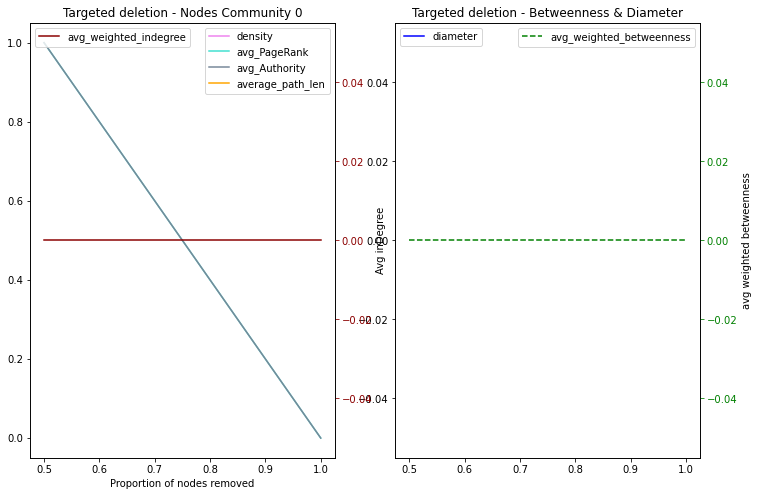

In [89]:
#Nodes
ni_com0_value_count, ni_com0_sortbydeg, ni_com0_dfplot = run_all(ni_com_0,0)

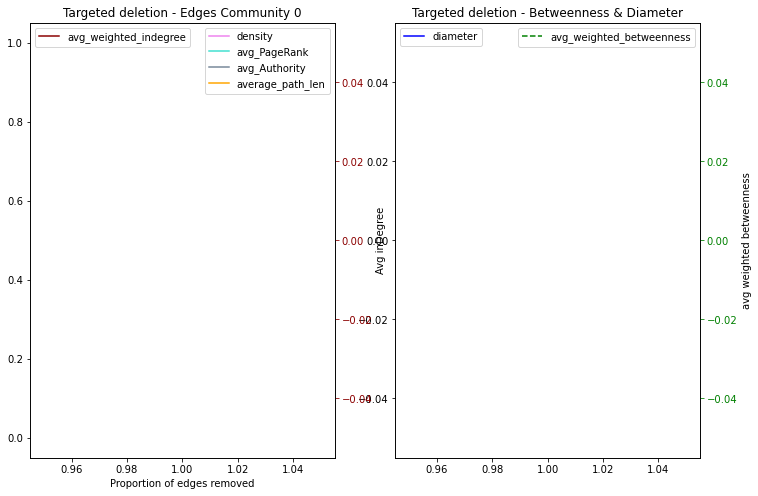

In [90]:
#edges
ni_com0_value_countedge, ni_com0_sortbydegedge, ni_com0_dfplotedge = run_all_edges(ni_com_0,0)

In [91]:
ni_com0_value_count

Malaysia    1
Name: node_start, dtype: int64

#### Community 1

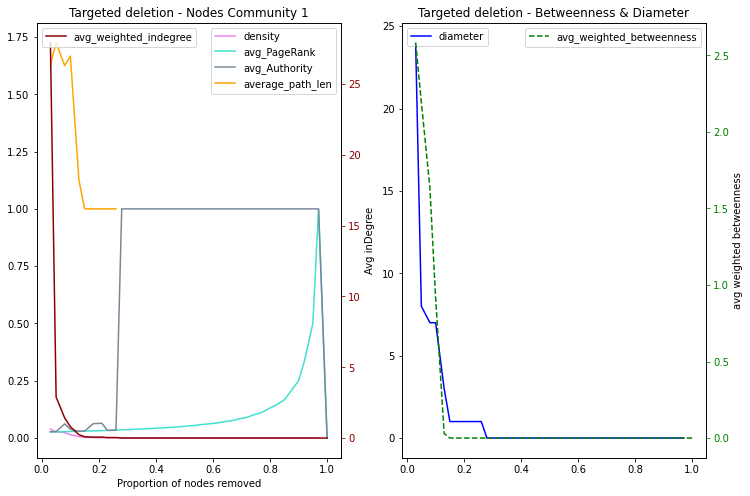

In [92]:
#Nodes
ni_com1_value_count, ni_com1_sortbydeg, ni_com1_dfplot = run_all(ni_com_1,1)

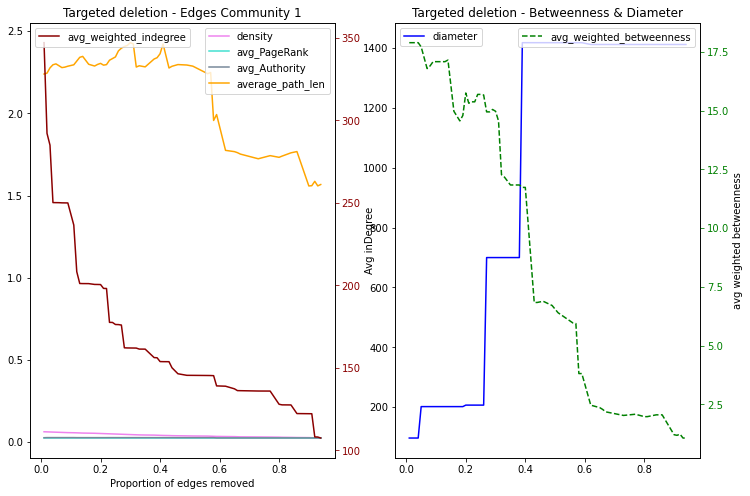

In [93]:
#Edge
ni_com1_value_countedge, ni_com1_sortbydegedge, ni_com1_dfplotedge = run_all_edges(ni_com_1,1)

#### Community 2

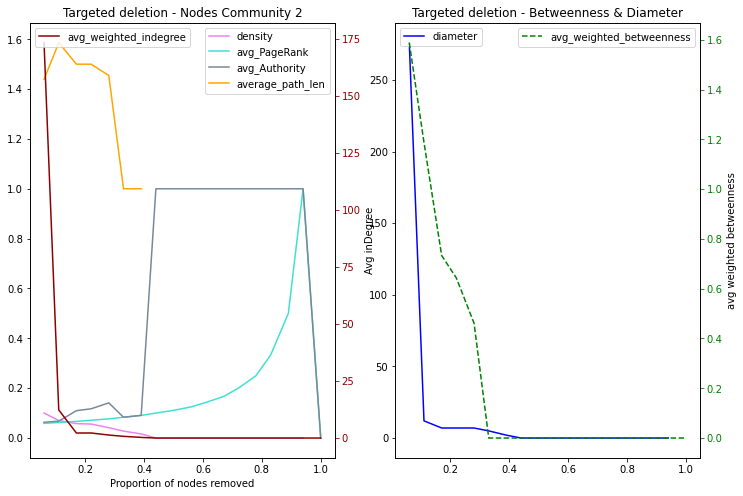

In [94]:
#Nodes
ni_com2_value_count, ni_com2_sortbydeg, ni_com2_dfplot = run_all(ni_com_2,2)

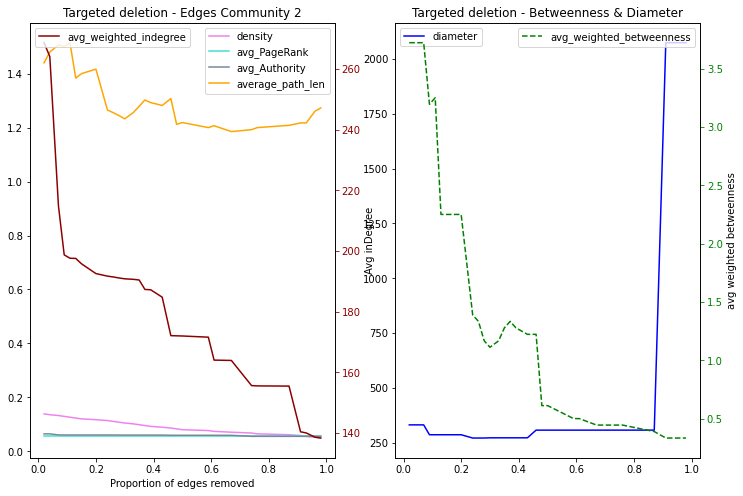

In [95]:
#Edge
ni_com2_value_countedge, ni_com2_sortbydegedge, ni_com2_dfplotedge = run_all_edges(ni_com_2,2)

#### Community 3

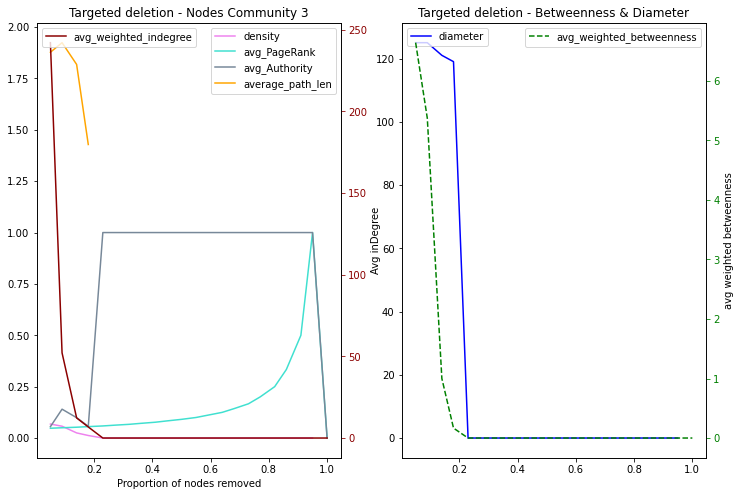

In [96]:
#Nodes
ni_com3_value_count, ni_com3_sortbydeg, ni_com3_dfplot = run_all(ni_com_3,3)

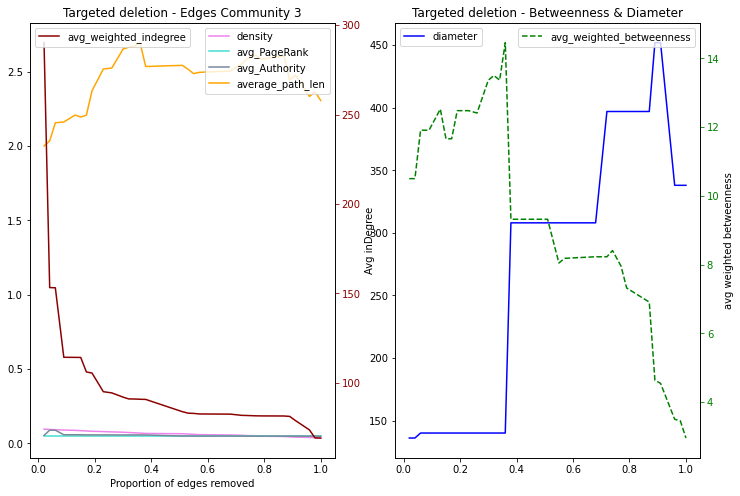

In [97]:
#Edges
ni_com3_value_countedge, ni_com3_sortbydegedge, ni_com3_dfplotedge = run_all_edges(ni_com_3,3)

#### Community 4

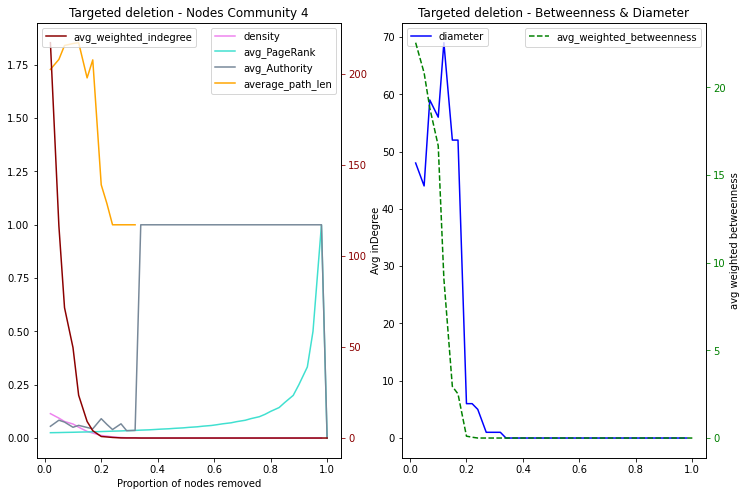

In [98]:
#Nodes
ni_com4_value_count, ni_com4_sortbydeg, ni_com4_dfplot = run_all(ni_com_4,4)

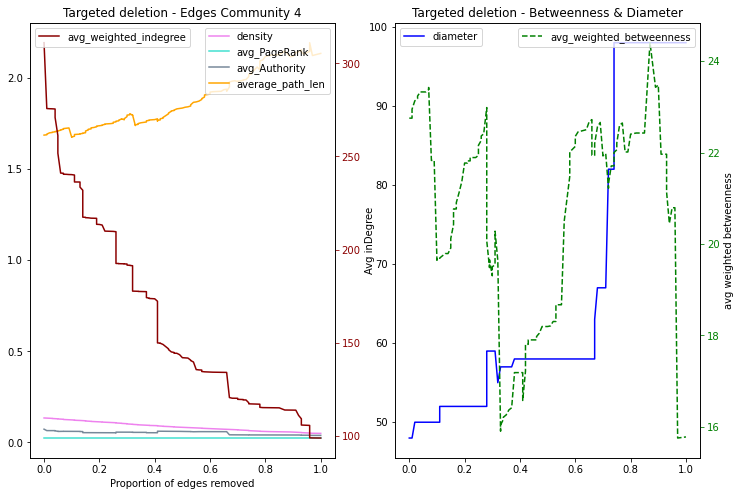

In [99]:
#edges
ni_com4_value_countedge, ni_com4_sortbydegedge, ni_com4_dfplotedge = run_all_edges(ni_com_4,4)

#### Community 5

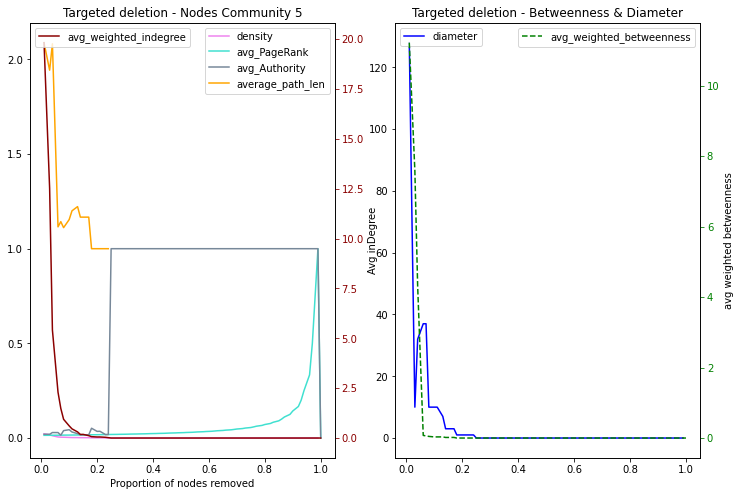

In [100]:
#Nodes
ni_com5_value_count, ni_com5_sortbydeg, ni_com5_dfplot = run_all(ni_com_5,5)

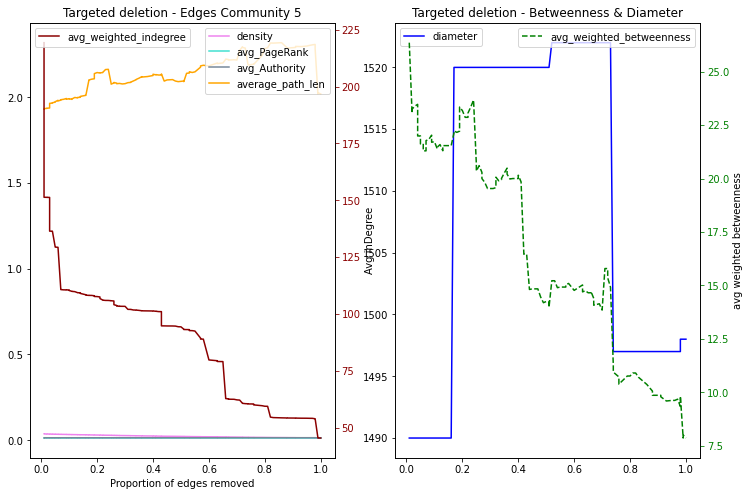

In [101]:
#edges
ni_com5_value_countedge, ni_com5_sortbydegedge, ni_com5_dfplotedge = run_all_edges(ni_com_5,5)

#### Community 6

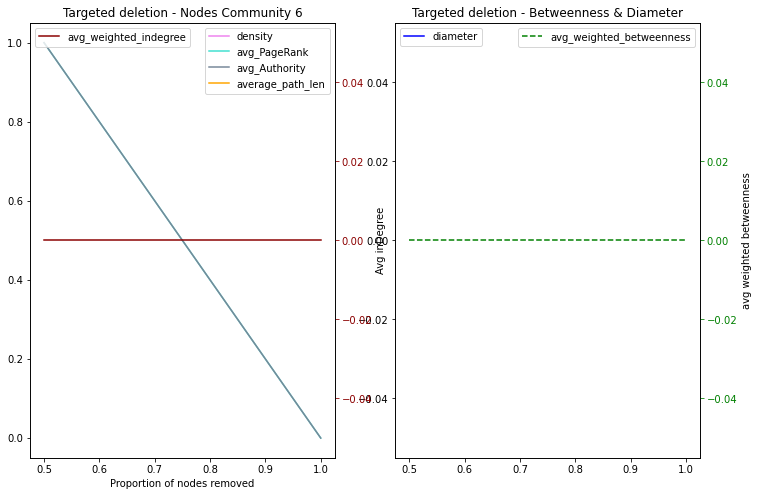

In [102]:
#Node
ni_com6_value_count, ni_com6_sortbydeg, ni_com6_dfplot = run_all(ni_com_6,6)

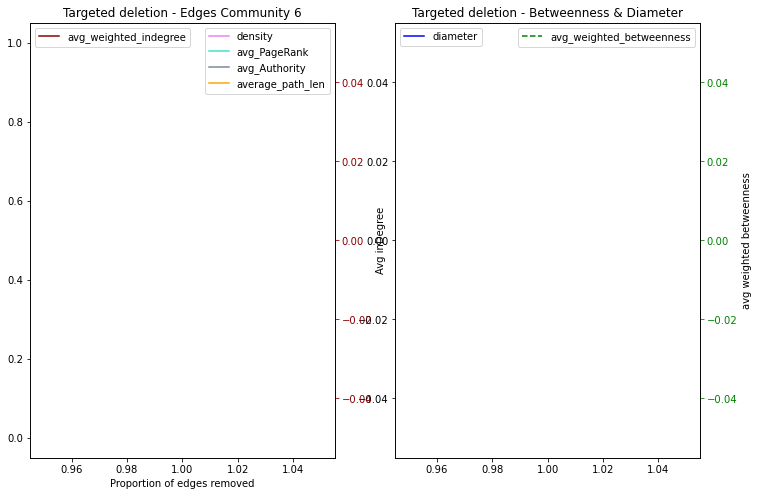

In [103]:
#Node
ni_com6_value_countedge, ni_com6_sortbydegedge, ni_com6_dfplotedge = run_all_edges(ni_com_6,6)

In [104]:
ni_com6_value_count

Macao    1
Name: node_start, dtype: int64